### 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

print('All packages successfully loaded')

All packages successfully loaded


### 2. Load Data & Peak Sheet

In [2]:
df = pd.read_excel("/Users/nova/Desktop/Thesis/Metabolomics ML/data/MTBLS90.xlsx", index_col="Idx")
df.head()

/Users/nova/Programming/anaconda3/envs/thesis/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,SampleID,Class,Sex,M1,M2,M3,M4,M5,M6,M7,...,M180,M181,M182,M183,M184,M185,M186,M187,M188,M189
Idx,,,,,,,,,,,,,,,,,,,,,
1,subject_1524,0,Female,14.98474,14.49947,12.097435,12.043818,11.436392,16.07217,17.01090,...,20.70097,20.19814,21.28179,21.09176,16.46404,12.269896,17.29323,19.81546,19.35259,12.71608
2,subject_1525,1,Male,15.17667,14.50172,12.363773,12.240458,11.577436,14.93265,16.90847,...,21.68605,20.51608,21.25777,20.53935,16.33413,12.031267,18.08144,19.96693,19.50694,13.20891
3,subject_1527,1,Male,15.35934,14.41941,12.510494,11.234959,11.199970,15.22600,17.17192,...,20.46320,20.34297,21.34793,20.81883,16.44281,12.679043,17.24765,20.01505,20.34058,12.98210
4,subject_1528,1,Male,15.12638,14.75630,13.001426,12.640496,11.244146,14.78994,16.47827,...,21.36879,20.93957,21.09719,20.82021,16.27483,12.323163,17.72392,19.57522,19.18157,12.41039
5,subject_1529,1,Male,15.20272,14.48083,12.392280,10.779516,10.968423,15.75598,17.20552,...,20.80482,19.82493,20.84250,20.31349,16.33279,12.352881,17.59348,19.88594,18.66284,12.37479


### 3. Extract X & Y

In [3]:
X = df.drop(columns=['SampleID', 'Sex', 'Class'])
y = df.Class

### 3.1 Data scaling

Dato che la Principal Component Analysis (PCA) è sensibile alla scala dei dati, è spesso consigliabile standardizzare i dati in modo che abbiano media pari a 0 e deviazione standard unitaria.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.2 Principal Component Analysis (PCA)

In [ ]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


print("Componenti principali:")
print(pca.components_)

print("\nVarianza spiegata:")
print(pca.explained_variance_ratio_)


### 5. Build Model

In [4]:
model = RandomForestClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  0.22164948453608246


### 6. PCA (Principal Component Analysis)

In [5]:
pca = PCA(n_components=0.98)
X_reduced = pca.fit_transform(X)
print("Number of original features: " + str(X.shape[1]))
print("Number of reduced features: " + str(X_reduced.shape[1]))

print("------------------------------------")
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=84)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)


Number of original features: 189
Number of reduced features: 100
------------------------------------
Mean Absolute Error:  0.36597938144329895


### 6.1 Plotting Attempt

Number of original features: 189
Number of reduced features: 2
------------------------------------
Mean Absolute Error:  0.4381443298969072


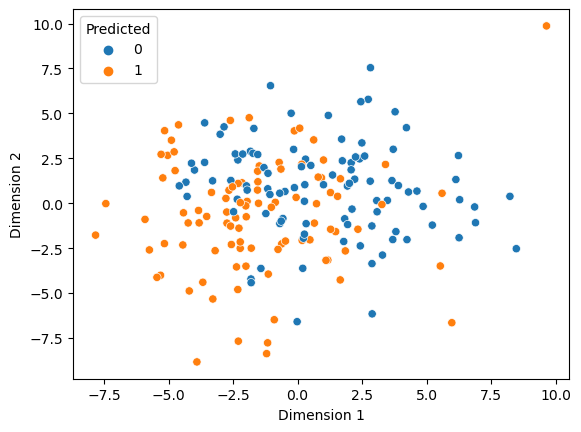

In [6]:
pca_2D = PCA(n_components = 2)
X_reduced_2D = pca_2D.fit_transform(X)
print("Number of original features: " + str(X.shape[1]))
print("Number of reduced features: " + str(X_reduced_2D.shape[1]))

print("------------------------------------")
X_train, X_test, y_train, y_test = train_test_split(X_reduced_2D, y, test_size=0.2, random_state=126)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

# Crea un DataFrame dai dati di test e dalle previsioni
result_df = pd.DataFrame({'Dimension 1': X_test[:, 0], 'Dimension 2': X_test[:, 1], 'Predicted': y_pred})

# Plottaiamo i dati utilizzando Seaborn
sns.scatterplot(data=result_df, x='Dimension 1', y='Dimension 2', hue='Predicted')

plt.show()


Risultato: con sole due features la correlazione è praticamente inutile